<a href="https://colab.research.google.com/github/Ayesha-Feroz/Ayesha-Feroz/blob/main/Testing_for_delta_mass_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Manually entered list of true masses
true_masses = np.array([500.0, 1000.5, 1500.75, 2000.1])  # Modify this list as needed

# Load the experimental data
exp_masses = pd.read_csv("/content/res35noise0centroid_ms1.csv")  # Adjust path accordingly
exp_masses = exp_masses['MonoisotopicMass'].values

# Define mass shifts
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts

# Function to match masses
def match_masses(exp_mass, true_masses, mass_shifts, tolerance=0.01):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    return min_diff <= tolerance, min_diff

# Evaluate each experimental mass
results = []
for mass in exp_masses:
    is_true, delta = match_masses(mass, true_masses, mass_shifts)
    results.append((mass, is_true, delta))

# Visualization
results_df = pd.DataFrame(results, columns=['Experimental Mass', 'Is True Positive', 'Delta'])
true_positives = results_df[results_df['Is True Positive']]
false_positives = results_df[~results_df['Is True Positive']]

plt.figure(figsize=(10, 6))
plt.scatter(true_positives['Delta'], true_positives['Experimental Mass'], color='green', label='True Positives')
plt.scatter(false_positives['Delta'], false_positives['Experimental Mass'], color='red', label='False Positives')
plt.xlabel('Delta Mass')
plt.ylabel('Experimental Mass')
plt.legend()
plt.title('Mass Spectrometry Analysis')
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/res35noise0centroid_ms1.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ask user to input true masses
input_masses = input("Enter true masses separated by commas: ")
true_masses = np.array([float(mass.strip()) for mass in input_masses.split(',')])

# Load the experimental data
exp_masses = pd.read_csv("/content/res35noise0centroid_ms1.csv")  # Adjust path accordingly
exp_masses = exp_masses['MonoisotopicMass'].values

# Define mass shifts
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts

# Function to match masses
def match_masses(exp_mass, true_masses, mass_shifts, tolerance=0.01):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    return min_diff <= tolerance, min_diff

# Evaluate each experimental mass
results = []
for mass in exp_masses:
    is_true, delta = match_masses(mass, true_masses, mass_shifts)
    results.append((mass, is_true, delta))

# Visualization
results_df = pd.DataFrame(results, columns=['Experimental Mass', 'Is True Positive', 'Delta'])
true_positives = results_df[results_df['Is True Positive']]
false_positives = results_df[~results_df['Is True Positive']]

plt.figure(figsize=(10, 6))
plt.scatter(true_positives['Delta'], true_positives['Experimental Mass'], color='green', label='True Positives')
plt.scatter(false_positives['Delta'], false_positives['Experimental Mass'], color='red', label='False Positives')
plt.xlabel('Delta Mass')
plt.ylabel('Experimental Mass')
plt.legend()
plt.title('Mass Spectrometry Analysis')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/res35noise0centroid_ms1.csv")
true_masses = np.array([500.0, 1000.5, 1500.75, 2000.1])  # Replace with your true masses

# Define mass shifts and tolerance
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts
tolerance = 0.1  # Adjust as needed

# Matching function
def match_masses(exp_mass, true_masses, mass_shifts, tolerance):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    closest_mass = possible_masses.flatten()[np.argmin(differences)]
    return (min_diff <= tolerance), min_diff, closest_mass - exp_mass

# Analyze data
data['Is True Positive'], data['Delta'], data['Delta Mass'] = zip(*data['MonoisotopicMass'].apply(
    lambda x: match_masses(x, true_masses, mass_shifts, tolerance)
))

# Plotting Monoisotopic Mass vs. Summed Intensity
plt.figure(figsize=(12, 6))
plt.scatter(data[data['Is True Positive']]['MonoisotopicMass'], data[data['Is True Positive']]['SumIntensity'], color='red', label='True Positive')
plt.scatter(data[~data['Is True Positive']]['MonoisotopicMass'], data[~data['Is True Positive']]['SumIntensity'], color='blue', label='False Positive')
plt.xlabel('Monoisotopic Mass')
plt.ylabel('Summed Intensity')
plt.title('Monoisotopic Mass vs. Summed Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Mass vs. Intensity
plt.figure(figsize=(12, 6))
plt.scatter(data['Delta Mass'], data['SumIntensity'], color='gray', alpha=0.5)
plt.xlabel('Delta Mass')
plt.ylabel('Intensity')
plt.title('Delta Mass Modifications vs. Intensity')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/res35noise0centroid_ms1.csv")
true_masses = np.array([500.0, 1000.5, 1500.75, 2000.1])  # Replace with your true masses

# Define mass shifts and tolerance
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts
tolerance = 0.1  # Adjust as needed

# Matching function
def match_masses(exp_mass, true_masses, mass_shifts, tolerance):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    closest_mass = possible_masses.flatten()[np.argmin(differences)]
    return (min_diff <= tolerance), min_diff, closest_mass - exp_mass

# Analyze data
data['Is True Positive'], data['Delta'], data['Delta Mass'] = zip(*data['MonoisotopicMass'].apply(
    lambda x: match_masses(x, true_masses, mass_shifts, tolerance)
))

# Plotting Monoisotopic Mass vs. Summed Intensity as Peaks
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    color = 'red' if row['Is True Positive'] else 'blue'
    plt.vlines(row['MonoisotopicMass'], 0, row['SumIntensity'], colors=color, label='True Positive' if row['Is True Positive'] else 'False Positive', alpha=0.5)

plt.xlabel('Monoisotopic Mass')
plt.ylabel('Summed Intensity')
plt.title('Peak Plot: Monoisotopic Mass vs. Summed Intensity')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Mass vs. Intensity as Peaks
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    plt.vlines(row['Delta Mass'], 0, row['SumIntensity'], colors='gray', alpha=0.5)

plt.xlabel('Delta Mass')
plt.ylabel('Intensity')
plt.title('Peak Plot: Delta Mass Modifications vs. Intensity')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("/content/res35noise0centroid_ms1.csv")
true_masses = np.array(['9105.3, 11858.0, 21429.8, 28963.7, 50429.8, and 67959.4'])  # Replace with your true masses

# Define mass shifts and tolerance
mass_shifts = np.array([0, 1.00784, 15.99491, -0.984016])  # Example shifts
tolerance = 0.1  # Adjust as needed

# Matching function
def match_masses(exp_mass, true_masses, mass_shifts, tolerance):
    possible_masses = true_masses.reshape(-1, 1) + mass_shifts
    differences = np.abs(possible_masses - exp_mass)
    min_diff = np.min(differences)
    closest_mass = possible_masses.flatten()[np.argmin(differences)]
    return (min_diff <= tolerance), min_diff, closest_mass - exp_mass

# Analyze data
data['Is True Positive'], data['Delta'], data['Delta Mass'] = zip(*data['MonoisotopicMass'].apply(
    lambda x: match_masses(x, true_masses, mass_shifts, tolerance)
))

# Normalize intensities for visualization purposes
data['Normalized Intensity'] = data['SumIntensity'] / data['SumIntensity'].max() * 100

# Plotting Monoisotopic Mass vs. Summed Intensity as Peaks with controlled height
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    color = 'red' if row['Is True Positive'] else 'blue'
    plt.vlines(row['MonoisotopicMass'], 0, row['Normalized Intensity'], colors=color, label='True Positive' if row['Is True Positive'] else 'False Positive', alpha=0.5)

plt.xlabel('Monoisotopic Mass')
plt.ylabel('Normalized Intensity')
plt.title('Normalized Peak Plot: Monoisotopic Mass vs. Summed Intensity')
plt.ylim(0, 120)  # Setting y-axis limit to a reasonable maximum
plt.legend()
plt.grid(True)
plt.show()

# Plotting Delta Mass vs. Normalized Intensity as Peaks
plt.figure(figsize=(12, 6))
for _, row in data.iterrows():
    plt.vlines(row['Delta Mass'], 0, row['Normalized Intensity'], colors='gray', alpha=0.5)

plt.xlabel('Delta Mass')
plt.ylabel('Normalized Intensity')
plt.title('Normalized Peak Plot: Delta Mass Modifications vs. Intensity')
plt.ylim(0, 120)  # Setting y-axis limit to a reasonable maximum
plt.grid(True)
plt.show()


In [ ]:
# The expected exact monoisotopic masses are 9,105.3, 11,858.0, 21,429.8, 28,963.7, 50,429.8, and 67,959.4 Da. The
# expected average masses are 9,111.5, 11,865.5, 21,442.6, 28,981.3, 50,459.7, and 68,001.2 Da
#79.966331
#modifications are  42.010565, -0.984016, 15.994915, 14.015650, 383.228103, -18.010565, -17.026549, 43.989829, 238.229666, 210.198366
541.061110, 204.187801, 28.990164, 272.250401, 27.994915, 0.984016, 94.967714, -131.040485, -89.029920

import pandas as pd
import numpy as np

def read_true_masses():
    """Prompts user to input six true protein masses."""
    true_masses = []
    for i in range(6):
        mass = float(input(f"Enter true mass {i+1}: "))
        true_masses.append(mass)
    return np.array(true_masses)

def read_modifications():
    """Prompts user to define modifications."""
    modifications = {}
    while True:
        mod = input("Enter modification name (or type 'done' to finish): ")
        if mod.lower() == 'done':
            break
        delta_mass = float(input(f"Enter delta mass for {mod}: "))
        modifications[mod] = delta_mass
    return modifications

def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Matches experimental masses against true masses considering modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate possible true masses with modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for index, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']
        if target_type > 0:
            continue  # skip decoys

        min_diff = float('inf')
        closest_mass = None
        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6
            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 2}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

def calculate_fdr(results):
    """Calculates the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)
    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Main script execution
if __name__ == "__main__":
    true_masses = read_true_masses()
    modifications = read_modifications()
    file_path = input("Enter the path to your TSV file: ")
    ppm_tolerance = float(input("Enter the ppm tolerance for matching: "))

    data = load_data(file_path)
    results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)
    fdr, tp, fp = calculate_fdr(results)

    print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
    print("Valid modifications detected more than twice:", valid_modifications)


In [ ]:
import pandas as pd
import numpy as np

def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Matches experimental masses against true masses considering modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate possible true masses with modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for index, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']
        if target_type > 0:
            continue  # skip decoys

        min_diff = float('inf')
        closest_mass = None
        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6
            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 2}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

def calculate_fdr(results):
    """Calculates the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)
    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Main script execution
if __name__ == "__main__":
    # Predefined true masses and modifications
    true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
    modifications = np.array(['42.010565, -0.984016, 15.994915, 14.015650, 383.228103, -18.010565, -17.026549, 43.989829, 238.229666, 210.198366, 541.061110, 204.187801, 28.990164, 272.250401, 27.994915, 0.984016, 94.967714, -131.040485, -89.029920'])
    file_path = input("Enter the path to your TSV file: ")
    ppm_tolerance = float(input("Enter the ppm tolerance for matching: "))

    data = load_data(file_path)
    results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)
    fdr, tp, fp = calculate_fdr(results)

    print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
    print("Valid modifications detected more than twice:", valid_modifications)


In [ ]:
import pandas as pd
import numpy as np

# Function to load data from TSV file
def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

# Function to match experimental masses with true masses and consider modifications
def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Match experimental masses with true masses and consider modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate all possible true masses with given modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for _, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']

        if target_type > 0:
            continue  # Skip decoys

        min_diff = float('inf')
        closest_mass = None

        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6

            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 1}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

# Function to calculate the False Discovery Rate (FDR)
def calculate_fdr(results):
    """Calculate the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)

    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Main script execution
if __name__ == "__main__":
    # Predefined true masses and common modifications
    true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

    # Converting modifications into a dictionary with keys as descriptions and values as delta masses
    modifications = {
        'Phospho': 79.966331,
        'Acetyl': 42.010565,
         'Amidated' : -0.984016,
         'Oxidation': 15.994915,
        'Methyl': 14.015650,
        #'LRGG': 383.228103,
        #'Glu->pyro-Glu': -18.010565,
        #'Gln->pyro-Glu': -17.026549,
        #'Carboxy': 43.989829,
        #'Palmitoyl': 238.229666,
        #'Myristoyl':  210.198366,
        #'ADP-Ribosyl' : 541.061110,
       # 'Farnesyl': 204.187801,
       # 'Nitrosyl': 28.990164,
        #'GeranylGeranyl': 272.250401,
        #'Formyl' : 27.994915,
        #'Deamidated': 0.984016,
         #'Sulfo+amino (Interim name)': 94.967714,
         #'Met-loss': -131.040485,
        #'Met-loss+Acetyl': -89.029920,
    }

    file_path = input("Enter the path to your TSV file: ")
    ppm_tolerance = float(input("Enter the ppm tolerance for matching: "))

    # Load the data
    data = load_data(file_path)

    # Get results and valid modifications
    results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)

    # Calculate FDR
    fdr, tp, fp = calculate_fdr(results)

    # Display outcomes
    print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
    print("Valid modifications detected more than twice:", valid_modifications)


In [ ]:
!pip install bokeh

In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Load data from TSV
file_path = "/content/20231207_NRTDP_Std_M5_C4_5cmCol_MRM_02_ms1.tsv"  # replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Filter the data to include only rows with TargetDecoyType = 0
filtered_data = data[data['TargetDecoyType'] == 0]

# Sort by MonoisotopicMass to ensure proper plotting order
filtered_data = filtered_data.sort_values(by='MonoisotopicMass')

# Set up Bokeh
output_notebook()

# Create a figure with appropriate labels and hover tools
p = figure(
    title="Mass Spectrum Peaks",
    x_axis_label="MonoisotopicMass",
    y_axis_label="SumIntensity",
    width=800,
    height=600,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add a scatter plot to represent peaks
p.circle(
    x=filtered_data['MonoisotopicMass'],
    y=filtered_data['SumIntensity'],
    size=6,
    color="blue",
    alpha=0.6,
    legend_label="Peaks"
)

# Add hover functionality to show detailed information on hover
hover = HoverTool(
    tooltips=[
        ("MonoisotopicMass", "@x"),
        ("SumIntensity", "@y"),
    ]
)

p.add_tools(hover)

# Show the plot
show(p)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Load data from TSV
file_path = "/content/20231207_NRTDP_Std_M5_C4_5cmCol_MRM_02_ms1.tsv"  # replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Filter the data to include only rows with TargetDecoyType = 0
filtered_data = data[data['TargetDecoyType'] == 0]

# Set up Bokeh
output_notebook()  # to display the plot in a Jupyter Notebook

# Create a figure with appropriate labels
p = figure(
    title="Interactive Mass Spectrum",
    x_axis_label="MonoisotopicMass",
    y_axis_label="SumIntensity",
    width=800,
    height=600,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add a scatter plot for MonoisotopicMass vs. SumIntensity
p.scatter(
    x=filtered_data['MonoisotopicMass'],
    y=filtered_data['SumIntensity'],
    size=5,
    color="blue",
    alpha=0.5,
    legend_label="Spectrum"
)

# Add hover functionality to display data on hover
hover = HoverTool(
    tooltips=[
        ("MonoisotopicMass", "@x"),
        ("SumIntensity", "@y"),
    ]
)

p.add_tools(hover)

# Show the plot
show(p)

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
import pandas as pd

# Load data from TSV
file_path = "/content/Experimental deconvolved file.tsv"  # Replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Filter the data to include only rows with TargetDecoyType = 0
filtered_data = data[data['TargetDecoyType'] == 0]

# Sort the data by MonoisotopicMass
filtered_data = filtered_data.sort_values('MonoisotopicMass')

# Set up Bokeh
output_notebook()  # to display the plot in a Jupyter Notebook

# Create a figure with appropriate labels and a logarithmic y-axis if needed
p = figure(
    title="Peptide Fragmentation Mass Spectrum",
    x_axis_label="MonoisotopicMass)",
    y_axis_label="Intensity",
    width=1024,
    height=768,
    tools="pan,wheel_zoom,box_zoom,reset,save",
    #y_axis_type="log"  # Uncomment this line if a log scale is needed
)

# Add a line plot for Mass vs. Intensity
p.line(
    x=filtered_data['MonoisotopicMass'],
    y=filtered_data['SumIntensity'],
    line_width=2,
    color="blue",
    alpha=0.7,
    legend_label="Spectrum"
)

# Add hover functionality to display data on hover
hover = HoverTool(
    tooltips=[
        ("m/z", "@x"),
        ("Intensity", "@y"),
    ]
)

p.add_tools(hover)

# Show the plot
show(p)


In [3]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Function to load data from TSV file
def load_data(file_path):
    """Load the TSV file into a DataFrame."""
    return pd.read_csv(file_path, sep='\t')

# Function to match experimental masses with true masses and consider modifications
def match_masses(data, true_masses, modifications, ppm_tolerance):
    """Match experimental masses with true masses and consider modifications."""
    results = []
    all_possible_masses = set(true_masses)
    mod_counts = {mod: 0 for mod in modifications}

    # Calculate all possible true masses with given modifications
    for mass in true_masses:
        for mod, delta_mass in modifications.items():
            mod_mass = mass + delta_mass
            all_possible_masses.add(mod_mass)

    # Matching process
    for _, row in data.iterrows():
        experimental_mass = row['MonoisotopicMass']
        target_type = row['TargetDecoyType']

        if target_type > 0:
            continue  # Skip decoys

        min_diff = float('inf')
        closest_mass = None

        for true_mass in all_possible_masses:
            diff = abs(experimental_mass - true_mass)
            ppm = (diff / true_mass) * 1e6

            if ppm < ppm_tolerance and ppm < min_diff:
                min_diff = ppm
                closest_mass = true_mass

        is_true = min_diff < ppm_tolerance
        results.append((experimental_mass, is_true, closest_mass))

        if closest_mass in true_masses:
            for mod, delta_mass in modifications.items():
                if abs(closest_mass - (experimental_mass - delta_mass)) < (ppm_tolerance / 1e6) * experimental_mass:
                    mod_counts[mod] += 1

    # Validate modification occurrence
    valid_modifications = {mod: count for mod, count in mod_counts.items() if count > 1}

    # Update true positive status based on valid modifications
    for i, (exp_mass, is_true, closest_mass) in enumerate(results):
        if not is_true and closest_mass is not None:
            for mod in valid_modifications:
                if abs(closest_mass + modifications[mod] - exp_mass) < (ppm_tolerance / 1e6) * exp_mass:
                    results[i] = (exp_mass, True, closest_mass)

    return results, valid_modifications

# Function to calculate the False Discovery Rate (FDR)
def calculate_fdr(results):
    """Calculate the False Discovery Rate."""
    true_positives = sum(1 for _, is_true, _ in results if is_true)
    false_positives = len(results) - true_positives
    total_targets = len(results)

    fdr = (false_positives / total_targets) * 100 if total_targets else 0
    return fdr, true_positives, false_positives

# Predefined true masses and common modifications
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

modifications = {
    'Phospho': 79.966331,
        'Acetyl': 42.010565,
         'Amidated' : -0.984016,
         'Oxidation': 15.994915,
        'Methyl': 14.015650,
        'LRGG': 383.228103,
        'Glu->pyro-Glu': -18.010565,
        'Gln->pyro-Glu': -17.026549,
        'Carboxy': 43.989829,
        'Palmitoyl': 238.229666,
        'Myristoyl':  210.198366,
        'ADP-Ribosyl' : 541.061110,
       'Farnesyl': 204.187801,
       'Nitrosyl': 28.990164,
        'GeranylGeranyl': 272.250401,
        'Formyl' : 27.994915,
        'Deamidated': 0.984016,
         'Sulfo+amino (Interim name)': 94.967714,
         'Met-loss': -131.040485,
        'Met-loss+Acetyl': -89.029920,
}

# User input for the file path and tolerances
file_path = "/content/Experimental deconvolved file.tsv" # Replace with your actual file path or use input() in interactive environments
ppm_tolerance = 20.0  # Replace with your actual ppm tolerance or use input()
Qvalue_threshold = 0.05  # Replace with your actual Q-value threshold or use input()

# Load the data
data = load_data(file_path)

# Get results and valid modifications
results, valid_modifications = match_masses(data, true_masses, modifications, ppm_tolerance)

# Filter the results based on Q-value threshold
matched_peaks = [r for r in results if r[1]]
unmatched_peaks = [r for r in results if not r[1]]

# Extract m/z and intensity for matched and unmatched peaks
matched_mz = [r[0] for r in matched_peaks]
matched_intensity = [data[data['MonoisotopicMass'] == mz]['SumIntensity'].iloc[0] for mz in matched_mz]

unmatched_mz = [r[0] for r in unmatched_peaks]
unmatched_intensity = [data[data['MonoisotopicMass'] == mz]['SumIntensity'].iloc[0] for mz in unmatched_mz]

# Calculate FDR
fdr, tp, fp = calculate_fdr(results)
print(f"True Positives: {tp}, False Positives: {fp}, FDR: {fdr}%")
print("Valid modifications detected more than twice:", valid_modifications)

# Set up Bokeh
output_notebook()

# Create a figure with appropriate labels
p = figure(
    title="Peptide Fragmentation Mass Spectrum",
    x_axis_label="m/z (mass-to-charge ratio)",
    y_axis_label="Intensity",
    width=1024,
    height=768,
    tools="pan,wheel_zoom,box_zoom,reset,save"
)

# Add the matched and unmatched peaks to the plot
p.circle(matched_mz, matched_intensity, size=5, color="green", alpha=0.5, legend_label="Matched Peaks")
p.circle(unmatched_mz, unmatched_intensity, size=5, color="red", alpha=0.5, legend_label="Unmatched Peaks")

# Add hover functionality to display data on hover
hover = HoverTool(
    tooltips=[
        ("m/z", "@x"),
        ("Intensity", "@y"),
    ]
)

p.add_tools(hover)
show(p)


True Positives: 431, False Positives: 3420, FDR: 88.8081017917424%
Valid modifications detected more than twice: {'Amidated': 9, 'Deamidated': 10}


In [ ]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

# Assuming the .tsv file is in the correct path, load the data
file_path = '/content/190507_Thermo_Std_FD2_ms1.tsv'  # Replace with your actual file path

# Read the TSV file into a pandas DataFrame
data = pd.read_csv(file_path, sep='\t')

# Sort the data by MonoisotopicMass to ensure correct plotting
data_sorted = data.sort_values(by='MonoisotopicMass')

# Specific masses to be highlighted in the spectrum
specific_masses = [9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4]

# Set up the output to display the plot within the Jupyter Notebook
output_notebook()

# Create a Bokeh figure with appropriate title and labels
p = figure(title="Peptide Fragmentation Mass Spectrum",
           x_axis_label='MonosiotopicMass',
           y_axis_label='Intensity')

# Add a hover tool that will show the m/z and intensity on hover
hover = HoverTool(tooltips=[("m/z", "@x"), ("Intensity", "@y")])
p.add_tools(hover)

# Plot the entire spectrum as individual points
p.scatter(data_sorted['MonoisotopicMass'], data_sorted['SumIntensity'], marker="circle", size=3, color="blue")

# Highlight specific masses with circles
for mass in specific_masses:
    peak_data = data_sorted[(data_sorted['MonoisotopicMass'] >= mass - 1) & (data_sorted['MonoisotopicMass'] <= mass + 1)]
    p.circle(peak_data['MonoisotopicMass'], peak_data['SumIntensity'], size=6, color="red", legend_label="Selected Peaks")

# Show the plot
show(p)


In [1]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter, Label
from bokeh.palettes import Category10

df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')
output_notebook()
cds = ColumnDataSource(data=df)

def create_p(width=800, height=300,
            main_title='Peptide Fragmentation Mass Spectrum'):
    tooltips = [
        ('m/z','@MonoisotopicMass{0.0000}'),
        ('Int','@SumIntensity')
        ]
    p = figure(
        width=width, height=height,
        title = main_title,
        tools = 'xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
        )
    return p
p = create_p()

p.vbar(
    x = 'MonoisotopicMass', top = 'SumIntensity',
    source = cds,
    color = '#324ea8',# alpha = 0.8,
    width = 0.001
    )
show(p)

In [ ]:
#Triplicate the points on the m/z axis
mzTransformed = [ (x, x, x) for x in df['MonoisotopicMass'] ]
#Flatten the list of tuples for the m/z axis
mzTransformed = [ x for y in mzTransformed for x in y ]
#Create the vertical bars for each intensity value
intensTransformed = [ (0, x, 0) for x in df['SumIntensity'] ]
#Flatten the list of tuples for the intensity axis
intensTransformed = [ x for y in intensTransformed for x in y ]
df2 = pd.DataFrame(
    { 'mz': mzTransformed, 'Intensity': intensTransformed }
)
df2.head(7)

,mz,Intensity
0,502.099235,0.0
1,502.099235,21499.1
2,502.099235,0.0
3,504.090296,0.0
4,504.090296,11484.8
5,504.090296,0.0
6,510.464152,0.0


In [ ]:
# Install required packages
!pip install pandas pyopenms


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 MB 4.9 MB/s eta 0:00:00


In [ ]:
pip install --upgrade bokeh


Total Targets: 887
True Positives: 299
False Positives: 588
True Positives:
     Index                                           FileName  ScanNum  \
131    132  /Users/kyowonjeong/Data/mzml/FLASHDeconv/simpl...      446   
136    137  /Users/kyowonjeong/Data/mzml/FLASHDeconv/simpl...      447   
144    145  /Users/kyowonjeong/Data/mzml/FLASHDeconv/simpl...      448   
152    153  /Users/kyowonjeong/Data/mzml/FLASHDeconv/simpl...      449   
154    155  /Users/kyowonjeong/Data/mzml/FLASHDeconv/simpl...      450   

     FeatureIndex  TargetDecoyType  RetentionTime  MassCountInSpec  \
131           NaN                0     496.864806                5   
136           NaN                0     497.573934                6   
144           NaN                0     498.214446                8   
152           NaN                0     498.838446                6   
154           NaN                0     499.451562                3   

      AverageMass  MonoisotopicMass  SumIntensity  ...  Ma

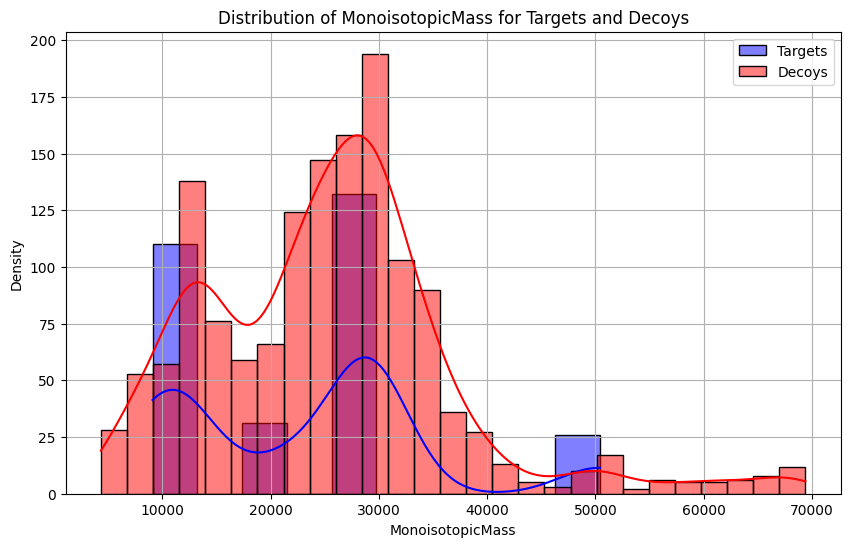

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Experimental deconvolved file.tsv"  # Adjust with the correct path
data = pd.read_csv(file_path, sep='\t')

# Define true masses and common modifications
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
modifications = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
        "Acetyl": 42.010565,
         "Amidated" : -0.984016,
        "Methyl": 14.015650,
        "LRGG": 383.228103,
        "Glu->pyro-Glu": -18.010565,
        "Gln->pyro-Glu": -17.026549,
        "Carboxy": 43.989829,
        "Palmitoyl": 238.229666,
        "Myristoyl":  210.198366,
        "ADP-Ribosyl" : 541.061110,
       "Farnesyl": 204.187801,
       "Nitrosyl": 28.990164,
        "GeranylGeranyl": 272.250401,
        "Formyl": 27.994915,
        "Deamidated": 0.984016,
         "Sulfo+amino (Interim name)": 94.967714,
         "Met-loss": -131.040485,
        "Met-loss+Acetyl": -89.029920,
    # Add other modifications if needed
}

ppm_tolerance = 20  # Parts per million tolerance

# Calculate PPM difference
def ppm_difference(detected_mass, true_mass):
    return np.abs(detected_mass - true_mass) / true_mass * 1e6

# Identify true positives
def is_true_positive(experimental_mass, true_masses, modifications, ppm_tolerance):
    # Check direct match within ppm tolerance
    for true_mass in true_masses:
        if ppm_difference(experimental_mass, true_mass) <= ppm_tolerance:
            return True
    # Check matches with allowed modifications
    for mod_name, delta_mass in modifications.items():
        for true_mass in true_masses:
            modified_mass = true_mass + delta_mass
            if ppm_difference(experimental_mass, modified_mass) <= ppm_tolerance:
                return True
    return False

# Add a column for True Positives
data['is_true_positive'] = data.apply(
    lambda row: is_true_positive(row['MonoisotopicMass'], true_masses, modifications, ppm_tolerance), axis=1
)

# Filter for TargetDecoyType = 0 and Qvalue <= 0.05
filtered_targets = data[(data['TargetDecoyType'] == 0) & (data['Qvalue'] <= 0.05)]

# Identify true positives and false positives
true_positives = filtered_targets[filtered_targets['is_true_positive']]
false_positives = filtered_targets[~filtered_targets['is_true_positive']]
decoys = data[data['TargetDecoyType'] > 0]

# Display results
print(f"Total Targets: {len(filtered_targets)}")
print(f"True Positives: {len(true_positives)}")
print(f"False Positives: {len(false_positives)}")

# Optional: Show first few rows of true positives and false positives
print("True Positives:")
print(true_positives.head())
print("False Positives:")
print(false_positives.head())

# Plot distributions
plt.figure(figsize=(10, 6))

# Plot target distribution
sns.histplot(true_positives['MonoisotopicMass'], kde=True, color='blue', label='Targets')

# Plot decoy distribution
sns.histplot(decoys['MonoisotopicMass'], kde=True, color='red', label='Decoys')

# Configure plot
plt.title('Distribution of MonoisotopicMass for Targets and Decoys')
plt.xlabel('MonoisotopicMass')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Load the data
file_path = "/content/Experimental deconvolved file.tsv"
ms1_data = pd.read_csv(file_path, sep='\t')

# Check if 'MonoisotopicMass' column exists
if 'MonoisotopicMass' not in ms1_data.columns:
    raise ValueError("The required column 'MonoisotopicMass' is missing from the data")

# Define true masses and mass tolerance
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])
mass_tolerance_ppm = 10

# Calculate allowable delta mass for each true mass
allowable_delta_mass = true_masses * (mass_tolerance_ppm / 1_000_000)

# Extract the observed masses from the dataset
observed_masses = ms1_data['MonoisotopicMass'].values

# Initialize lists to classify observed masses as true or false positives
true_positives = []
false_positives = []

# Check each observed mass against each true mass within the allowable delta
for observed_mass in observed_masses:
    is_true_positive = False
    for i, true_mass in enumerate(true_masses):
        delta_mass = abs(observed_mass - true_mass)
        if delta_mass <= allowable_delta_mass[i]:
            is_true_positive = True
            true_positives.append(observed_mass)
            break
    if not is_true_positive:
        false_positives.append(observed_mass)

# Calculate the number of true and false positives
num_true_positives = len(true_positives)
num_false_positives = len(false_positives)

# Calculate FDR
total_positives = num_true_positives + num_false_positives
fdr = (num_false_positives / total_positives) * 100 if total_positives > 0 else 0

print(f"Number of True Positives: {num_true_positives}")
print(f"Number of False Positives: {num_false_positives}")
print(f"False Discovery Rate (FDR): {fdr}%")


Number of True Positives: 162
Number of False Positives: 5137
False Discovery Rate (FDR): 96.94281939988677%


In [13]:
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='MS1 deconvolved dataset from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),  # Display the mass with 4 decimal places
        ('Int', '@SumIntensity')               # Display the intensity
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Show the plot
show(p)


In [14]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='PIP Dataset'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses
p.circle(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    legend_label='True Masses'
)

# Show the plot
show(p)


In [ ]:
pip install jupyter_bokeh

In [22]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.layouts import gridplot

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': [], 'label': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)
        true_mass_markers['label'].append(f'{mass:.4f}')

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='Deconvolved PIP data set from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses
p.circle(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    #legend_label='True Masses'
)

# Add labels above red dots
labels = LabelSet(x='mass', y='intensity', text='label', level='glyph',
                  x_offset=0, y_offset=3, source=true_mass_cds,
                  text_font_size="8pt", text_color="black")
p.add_layout(labels)

# Show the plot
show(p)


In [38]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import gridplot

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    # Find the subset of dataframe where mass is within a certain window
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        # Return the highest intensity in this window
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return None

# Add markers for true masses
true_mass_markers = {'mass': [], 'intensity': []}
for mass in true_masses:
    intensity = find_nearest_intensity(mass, filtered_df)
    if intensity:
        true_mass_markers['mass'].append(mass)
        true_mass_markers['intensity'].append(intensity)

# Convert markers to ColumnDataSource
true_mass_cds = ColumnDataSource(data=true_mass_markers)

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create a ColumnDataSource from the filtered DataFrame
cds = ColumnDataSource(data=filtered_df)

def create_p(width=800, height=300, main_title='Deconvolved PIP dataset from FD'):
    tooltips = [
        ('m/z', '@MonoisotopicMass{0.0000}'),
        ('Int', '@SumIntensity')
    ]
    p = figure(
        width=width, height=height,
        title=main_title,
        tools='xwheel_zoom,xpan,box_zoom,undo,reset',
        tooltips=tooltips
    )
    return p

# Create the plot
p = create_p()

# Add a vertical bar plot to the figure
p.vbar(
    x='MonoisotopicMass', top='SumIntensity',
    source=cds,
    color='#324ea8',
    width=0.001  # Set the width of the bars
)

# Add red dots for true masses
p.circle(
    x='mass', y='intensity',
    source=true_mass_cds,
    size=10,
    color='red',
    legend_label='True Masses'
)

# Show the plot
show(p)


IndexError: index 599 is out of bounds for axis 0 with size 599

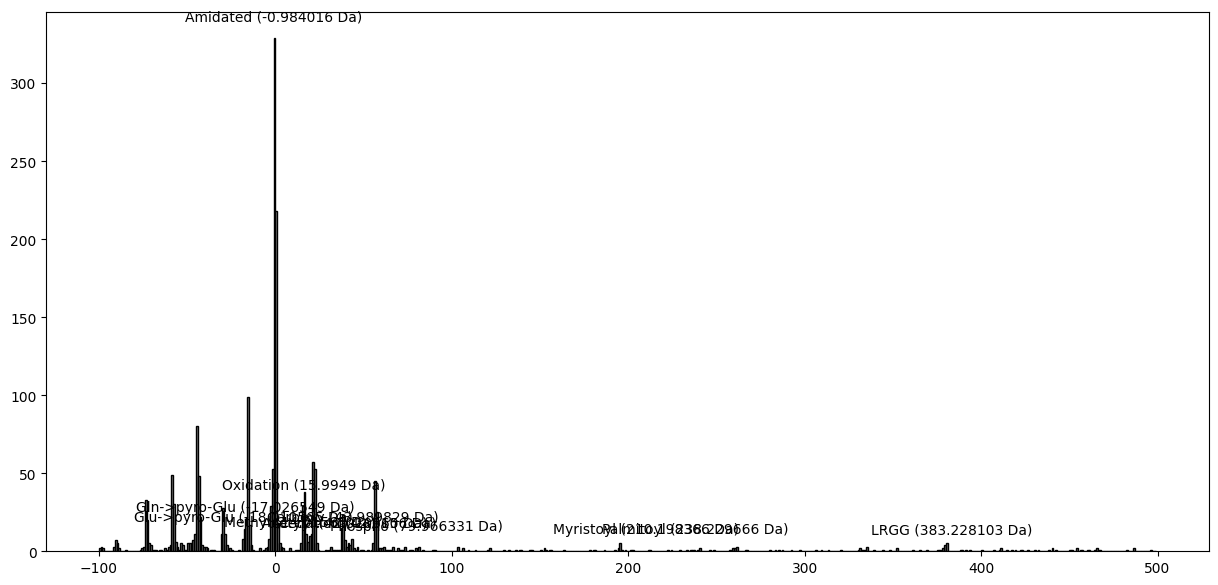

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This placeholder assumes your dataset has a column 'Observed Mass' or similar
# If not, replace 'Observed Mass' with the appropriate column name
observed_masses = df['MonoisotopicMass'].values

# Calculate the closest delta mass for each observed mass
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Define bins for the histogram, focusing around common PTM delta masses
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(15, 7))
counts, _, patches = plt.hist(delta_masses, bins=bins, color='gray', edgecolor='black')

# Annotate specific PTMs, these should be known delta masses of interest
ptms = {
  "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Adding annotations for the PTMs
for ptm, mass in ptms.items():
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, counts[np.digitize(mass, bins) - 1] + 5),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


In [4]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Calculate modified masses for each true mass with each PTM
modified_masses = []
colors = []
labels = []
for mass in true_masses:
    for ptm, delta_mass in ptms.items():
        mod_mass = mass + delta_mass
        intensity = find_nearest_intensity(mod_mass, filtered_df, width=10)
        if intensity > 0:
            modified_masses.append((mod_mass, intensity))
            colors.append(ptm)
            labels.append(f"{ptm} (+{delta_mass})")

# Create a ColumnDataSource for the modified masses
source = ColumnDataSource(data=dict(x=[m[0] for m in modified_masses], y=[m[1] for m in modified_masses], color=colors, label=labels))

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='PTM ',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset', tooltips="@label: @x{0.0000} Da")

# Add a vertical bar plot to the figure for each PTM
p.circle('x', 'y', size=8, source=source,
         color=factor_cmap('color', palette=Category20_20, factors=colors), legend_field='color')

# Configure plot aesthetics
p.legend.title = 'PTM Type'
p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


In [6]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Calculate modified masses for each true mass with each PTM and collect true mass intensities
modified_masses = []
true_mass_intensities = []
colors = []
labels = []
for mass in true_masses:
    # Add true mass peaks
    true_intensity = find_nearest_intensity(mass, filtered_df, width=10)
    true_mass_intensities.append((mass, true_intensity))

    # Add modified masses
    for ptm, delta_mass in ptms.items():
        mod_mass = mass + delta_mass
        intensity = find_nearest_intensity(mod_mass, filtered_df, width=10)
        if intensity > 0:
            modified_masses.append((mod_mass, intensity))
            colors.append(ptm)
            labels.append(f"{ptm} (+{delta_mass})")

# Create ColumnDataSource for the modified and true masses
modified_source = ColumnDataSource(data=dict(x=[m[0] for m in modified_masses], y=[m[1] for m in modified_masses], color=colors, label=labels))
true_mass_source = ColumnDataSource(data=dict(x=[m[0] for m in true_mass_intensities], y=[m[1] for m in true_mass_intensities]))

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='Peptide Fragmentation Mass Spectrum',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset', tooltips="@label: @x{0.0000} Da")

# Add circles for PTM-modified masses
p.circle('x', 'y', size=8, source=modified_source,
         color=factor_cmap('color', palette=Category20_20, factors=colors), legend_field='color')

# Add large red circles for true masses
p.circle('x', 'y', size=15, color="red", source=true_mass_source, legend_label='True Masses')

# Configure plot aesthetics
p.legend.title = 'PTM Type and True Masses'
p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


In [5]:
import pandas as pd
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20_20
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Filter the dataset to include only those entries where TargetDecoyType = 0 and Qvalue <= 0.05
filtered_df = df[(df['TargetDecoyType'] == 0) & (df['Qvalue'] <= 0.05)]

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Define the PTMs and their masses
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920

}

# Function to find nearest intensity for a given mass
def find_nearest_intensity(mass, dataframe, width=10):
    mass_window = dataframe[(dataframe['MonoisotopicMass'] >= mass - width) & (dataframe['MonoisotopicMass'] <= mass + width)]
    if not mass_window.empty:
        return mass_window.loc[mass_window['SumIntensity'].idxmax()]['SumIntensity']
    return 0

# Calculate modified masses and collect true mass intensities
modified_masses = []
true_mass_intensities = []
colors = []
labels = []
for mass in true_masses:
    true_intensity = find_nearest_intensity(mass, filtered_df, width=10)
    true_mass_intensities.append((mass, true_intensity))  # Collect true mass data
    for ptm, delta_mass in ptms.items():
        mod_mass = mass + delta_mass
        intensity = find_nearest_intensity(mod_mass, filtered_df, width=10)
        if intensity > 0:
            modified_masses.append((mod_mass, intensity))
            colors.append(ptm)
            labels.append(f"{ptm} (+{delta_mass})")

# Create ColumnDataSource for the modified and true masses
modified_source = ColumnDataSource(data=dict(x=[m[0] for m in modified_masses], y=[m[1] for m in modified_masses], color=colors, label=labels))
true_mass_source = ColumnDataSource(data=dict(x=[m[0] for m in true_mass_intensities], y=[m[1] for m in true_mass_intensities]))

# Configure Bokeh to display plots in the notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title='Peptide Fragmentation Mass Spectrum',
           tools='xwheel_zoom,xpan,box_zoom,undo,reset', tooltips="@label: @x{0.0000} Da")

# Add circles for PTM-modified masses
p.circle('x', 'y', size=8, source=modified_source,
         color=factor_cmap('color', palette=Category20_20, factors=colors), legend_field='color')

# Add squares for true masses
p.square('x', 'y', size=10, color="black", source=true_mass_source, legend_label='True Masses')

# Configure plot aesthetics
p.legend.title = 'PTM Type and True Masses'
p.legend.location = 'top_right'
p.xaxis.axis_label = "Mass/Da"
p.yaxis.axis_label = "Intensity"

# Show the plot
show(p)


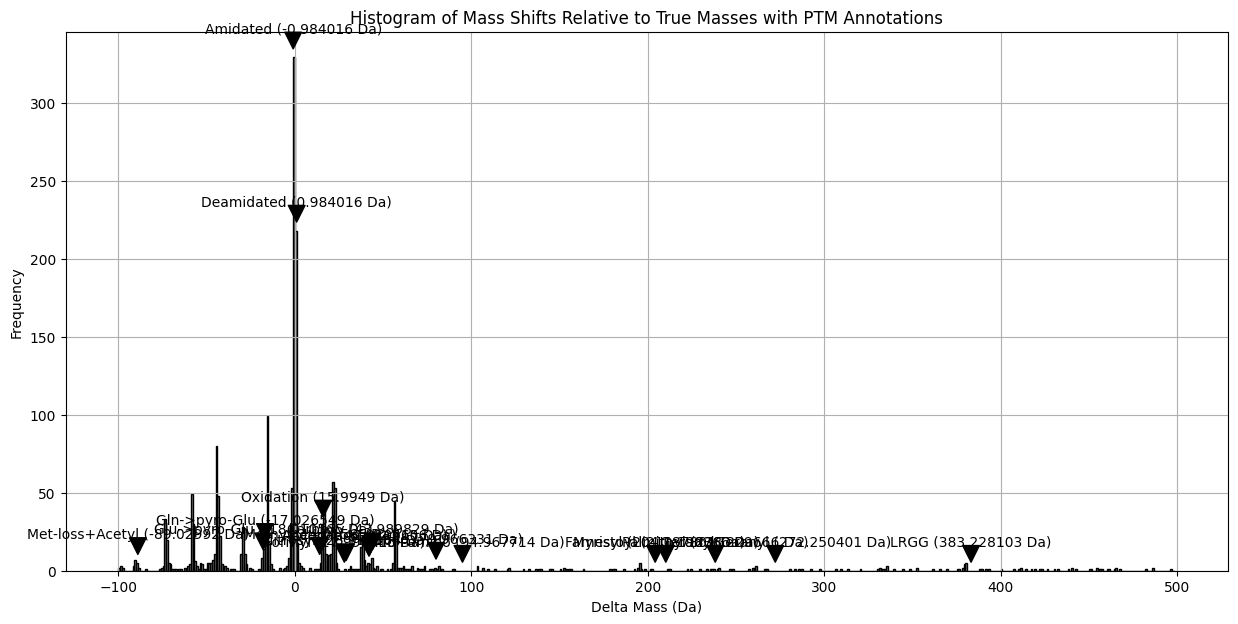

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This assumes your dataset has a column 'Observed Mass'
observed_masses = df['MonoisotopicMass'].values  # Ensure this column exists or adjust accordingly

# Calculate the closest delta mass for each observed mass
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Define bins for the histogram, focusing around common PTM delta masses
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(15, 7))
counts, bins_array, patches = plt.hist(delta_masses, bins=bins, color='gray', edgecolor='black')

# Annotate specific PTMs, these should be known delta masses of interest
ptms ={
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
       }


# Adding annotations for the PTMs
for ptm, mass in ptms.items():
    index = np.digitize(mass, bins_array) - 1
    index = min(index, len(counts) - 1)  # Ensure index does not go out of bounds
    height = counts[index]
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, height + 5),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


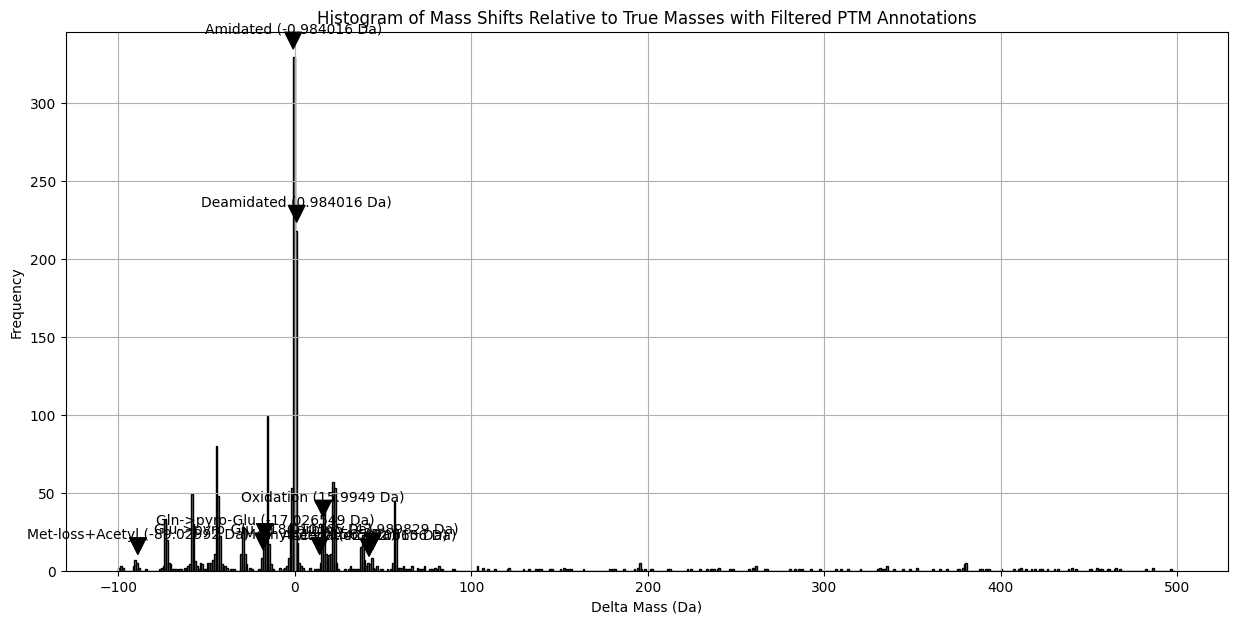

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This assumes your dataset has a column 'Observed Mass'
observed_masses = df['MonoisotopicMass'].values  # Ensure this column exists or adjust accordingly

# PTMs and their associated mass shifts
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Count occurrences of each PTM-related delta mass
ptm_counts = {ptm: np.sum((delta_masses >= shift - 0.5) & (delta_masses <= shift + 0.5)) for ptm, shift in ptms.items()}

# Filter PTMs to include only those with more than two occurrences
filtered_ptms = {ptm: shift for ptm, shift in ptms.items() if ptm_counts[ptm] >= 2}

# Define bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(15, 7))
counts, bins_array, patches = plt.hist(delta_masses, bins=bins, color='gray', edgecolor='black')

# Annotating the PTMs that meet the criteria
for ptm, mass in filtered_ptms.items():
    index = np.digitize(mass, bins_array) - 1
    index = min(index, len(counts) - 1)  # Ensure index does not go out of bounds
    height = counts[index]
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, height + 5),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with Filtered PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


In [14]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Assume you have calculated the observed mass somewhere
observed_masses = df['MonoisotopicMass'].values  # Adjust according to your column name

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust as necessary
hist, edges = np.histogram(delta_masses, bins=bins)

# Prepare labels for PTMs, initially empty, filled only where applicable
labels = [''] * len(hist)
ptms = {
     "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}
# Assign labels at relevant positions
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1  # Get the bin index for each PTM
    if bin_index < len(labels):
        labels[bin_index] = f'{ptm} ({shift} Da)'

# Create ColumnDataSource
source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:],
    'label': labels
})

# Output to notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset", x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=source, fill_color='gray', line_color='black')

# Add hover tool
hover = HoverTool(tooltips=[("PTM", "@label"), ("Count", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


In [15]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Assume you have calculated the observed mass somewhere
observed_masses = df['MonoisotopicMass'].values  # Adjust according to your column name

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust as necessary
hist, edges = np.histogram(delta_masses, bins=bins)

# Prepare labels for PTMs, initially empty, filled only where applicable
labels = [''] * len(hist)
ptms = {
      "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    "Acetyl": 42.010565,
    "Amidated": -0.984016,
    "Methyl": 14.015650,
    "LRGG": 383.228103,
    "Glu->pyro-Glu": -18.010565,
    "Gln->pyro-Glu": -17.026549,
    "Carboxy": 43.989829,
    "Palmitoyl": 238.229666,
    "Myristoyl": 210.198366,
    "ADP-Ribosyl": 541.061110,
    "Farnesyl": 204.187801,
    "Nitrosyl": 28.990164,
    "GeranylGeranyl": 272.250401,
    "Formyl": 27.994915,
    "Deamidated": 0.984016,
    "Sulfo+amino": 94.967714,
    "Met-loss": -131.040485,
    "Met-loss+Acetyl": -89.029920
}
# Assign labels at relevant positions
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1  # Get the bin index for each PTM
    if bin_index < len(labels):
        labels[bin_index] = f'{ptm} ({shift} Da)'

# Create ColumnDataSource
source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:],
    'label': labels
})

# Output to notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset", x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=source, fill_color='gray', line_color='black')

# Add hover tool
hover = HoverTool(tooltips=[("PTM", "@label"), ("Count", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


In [36]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Calculate observed mass and delta masses
observed_masses = df['MonoisotopicMass'].values
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)
hist, edges = np.histogram(delta_masses, bins=bins)

# Prepare labels for PTMs, initially empty, filled only where applicable
labels = [''] * len(hist)
ptms = {
    "Oxidation": 15.9949,
    "Acetylation": 42.0106,
    "Phospho": 79.966331,
    # Additional PTMs...
}

# Assign labels at relevant positions
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1
    if bin_index < len(labels):
        labels[bin_index] = f'{ptm} ({shift} Da)'

# Create ColumnDataSource
source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:],
    'label': labels
})

# Output to notebook
output_notebook()

# Create the plot without grid lines
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset",
           x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Remove grid lines
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=source, fill_color='gray', line_color='black')

# Add hover tool
hover = HoverTool(tooltips=[("PTM", "@label"), ("Count", "@top")])
p.add_tools(hover)

# Show the plot
show(p)


In [37]:
import pandas as pd
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.layouts import column

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# Assuming 'Observed Mass' column exists in your dataset, calculate delta masses
observed_masses = df['MonoisotopicMass'].values  # Replace 'Observed Mass' with the actual column name if different

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust as necessary
hist, edges = np.histogram(delta_masses, bins=bins)

# Create ColumnDataSource for the histogram
hist_source = ColumnDataSource(data={
    'top': hist,
    'left': edges[:-1],
    'right': edges[1:]
})

# Define PTMs and their associated mass shifts
ptms = {
     "Oxidation": 16,
    "Acetylation": 42,
    "Phospho": 80,
    "Acetyl": 42,
    "Amidated": -1,
    "Methyl": 14,
    "LRGG": 383,
    "Glu->pyro-Glu": -18,
    "Gln->pyro-Glu": -17,
    "Carboxy": 44,
    "Palmitoyl": 238,
    "Myristoyl": 210,
    "ADP-Ribosyl": 541,
    "Farnesyl": 204,
    "Nitrosyl": 29,
    "GeranylGeranyl": 272,
    "Formyl": 28,
    "Deamidated": 1,
    "Sulfo+amino": 95,
    "Met-loss": -131,
    "Met-loss+Acetyl": -89
}

# Prepare data for PTM labels
ptm_data = {
    'x': [],
    'y': [],
    'text': []
}
for ptm, shift in ptms.items():
    bin_index = np.digitize([shift], bins)[0] - 1
    if bin_index < len(hist) and hist[bin_index] > 0:
        ptm_data['x'].append(shift)
        ptm_data['y'].append(hist[bin_index] + 5)  # slightly above the histogram bar
        ptm_data['text'].append(f'{ptm} ({shift} Da)')

# Create ColumnDataSource for PTM labels
label_source = ColumnDataSource(data=ptm_data)

# Output to notebook
output_notebook()

# Create the plot
p = figure(width=800, height=300, title="PTM Delta Mass Histogram",
           tools="pan,wheel_zoom,box_zoom,reset", x_axis_label='Delta Mass (Da)', y_axis_label='Frequency')

# Add quads for the histogram
p.quad(bottom=0, top='top', left='left', right='right', source=hist_source, fill_color='gray', line_color='black')

# Add labels for PTMs
labels = LabelSet(x='x', y='y', text='text', level='glyph',
                  x_offset=5, y_offset=5, source=label_source, text_font_size="8pt", text_color="black")
p.add_layout(labels)

# Add hover tool that will display the count
hover = HoverTool(tooltips=[("Count", "@top"), ("Delta Mass", "@left{0.0}")])
p.add_tools(hover)

# Show the plot
show(p)


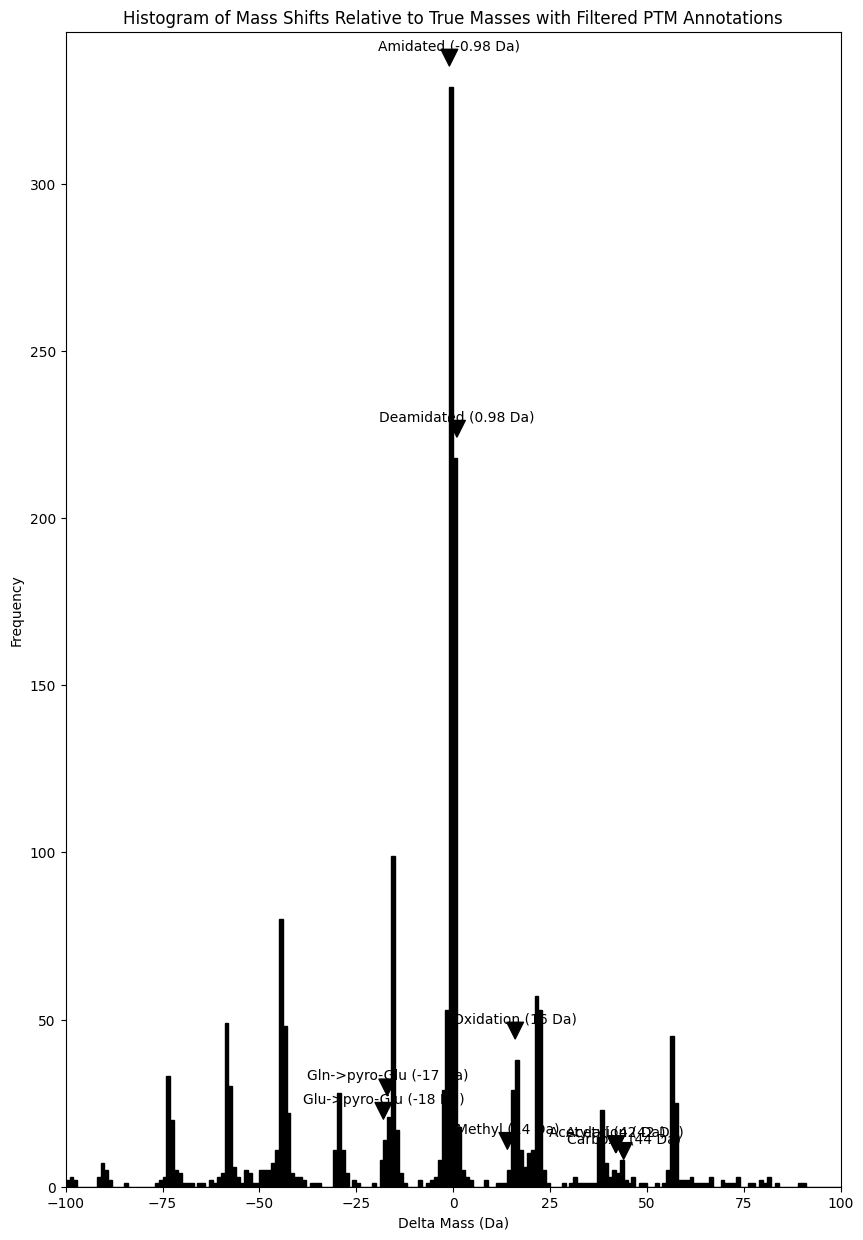

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Experimental deconvolved file.tsv', sep='\t')

# Define true masses
true_masses = np.array([9105.3, 11858.0, 21429.8, 28963.7, 50429.8, 67959.4])

# This assumes your dataset has a column 'Observed Mass'
observed_masses = df['MonoisotopicMass'].values  # Ensure this column exists or adjust accordingly

# PTMs and their associated mass shifts
ptms = {
    "Oxidation": 16,
    "Acetylation": 42,
    "Phospho": 80,
    "Acetyl": 42,
    "Amidated": -0.98,
    "Methyl": 14,
    "LRGG": 383,
    "Glu->pyro-Glu": -18,
    "Gln->pyro-Glu": -17,
    "Carboxy": 44,
    "Palmitoyl": 238,
    "Myristoyl": 210,
    "ADP-Ribosyl": 541,
    "Farnesyl": 204,
    "Nitrosyl": 29,
    "GeranylGeranyl": 272,
    "Formyl": 28,
    "Deamidated": 0.98,
    "Sulfo+amino": 95,
    "Met-loss": -131,
    "Met-loss+Acetyl": -89

}

# Calculate all delta masses
delta_masses = np.concatenate([observed_masses - mass for mass in true_masses])

# Count occurrences of each PTM-related delta mass
ptm_counts = {ptm: np.sum((delta_masses >= shift - 0.5) & (delta_masses <= shift + 0.5)) for ptm, shift in ptms.items()}

# Filter PTMs to include only those with more than two occurrences
filtered_ptms = {ptm: shift for ptm, shift in ptms.items() if ptm_counts[ptm] > 2}

# Define bins for the histogram
bins = np.arange(-100, 500, 1)  # Adjust this range and bin width as necessary

# Plotting the histogram
plt.figure(figsize=(10, 15))
counts, bins_array, patches = plt.hist(delta_masses, bins=bins, color='black', edgecolor='black')

# Annotating the PTMs that meet the criteria
for ptm, mass in filtered_ptms.items():
    index = np.digitize(mass, bins_array) - 1
    index = min(index, len(counts) - 1)  # Ensure index does not go out of bounds
    height = counts[index]
    plt.annotate(f'{ptm} ({mass} Da)', xy=(mass, height + 6),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', arrowprops=dict(facecolor='black', shrink=0.05))

# Labeling the plot
plt.title('Histogram of Mass Shifts Relative to True Masses with Filtered PTM Annotations')
plt.xlabel('Delta Mass (Da)')
plt.ylabel('Frequency')
plt.xlim(-100, 100)  # Limit x-axis from -100 to 100
plt.grid(False)

# Show the plot
plt.show()
